# Imports

In [10]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# Scale Free Network Generator

In [11]:
def powerlaw_degree_sequence(n, gamma, k_min):
    """ Implements the method for generating power-law distributed numbers
    from uniformly-distributed numbers described in Clauset et al., 2009,
    appendix D"""
    r = np.random.uniform(0, 1, size=n)
    deg = np.floor((k_min-0.5)*(1.0 - r)**(-1.0/(gamma-1)) + 0.5)
    deg = list(map(int, deg))
    return deg

In [12]:
def sf_net(n,  gamma, k_min):
    deg = powerlaw_degree_sequence(n, gamma, k_min)
    # sum of all degrees must be even. Why is that?
    if sum(deg) % 2 == 1:
        deg[0] += 1
    G = nx.configuration_model(deg)
    H = nx.Graph(G)
    H.remove_edges_from(nx.selfloop_edges(H))
    return H

# Hands-on exercise
* Split into groups of two and pick different values of $\gamma = 2.001, 2.5, 3$, and $3.5$ within the group
* All groups should use the code above to generate networks of sizes $10^2 \ldots 10^5$ as before with their chosen scaling exponent. Generate all networks with minimum degree cutoff $k_{min}$= 5

### Tasks

* First, measure the maximum degree of each network $k_{max}$, and then plot $k_{max}$ in log-log scale as a function of $N$ 
* Next, I want you to plot the average shortest-path distance as a function of $N$ in semi-log scale. 
* Note that for larger networks it will be impossible to measure all pairs shortest paths. As an approximation, you should take a random *sample* of pairs of nodes (src, dest), measure the shortest path length between src and dest, and then take the average. Use 100 random node pairs per network.

### Hints

* Hint 1: `[np.random.choice(G, size=2, replace=False) for _ in range(100)]` will give you a list of 100 random
node pairs from G
* Hint 2: You will need to run this within one component. Choose the largest. The following code will sort the components from largest to smallest

`components = sorted(components, key=len, reverse=True)`

You can then use the `subgraph` command on the first component (`components[0]`)
* Hint 3: Use `nx.shortest_path_length` and `nx.connected_components`. They are more likely to be faster than what you might write.

In [13]:
def max_degree(n, gamma, k_min):
    return k_min * (n**(1.0/gamma-1.0))

In [14]:
gamma = 2.5
n_list = [10**2, 10**3, 10**4, 10**5]
k_min = 5

In [15]:
k_max_list = list(map(lambda n: max_degree(n, gamma = 2.5, k_min=5), n_list))

print(k_max_list)

[0.3154786722400966, 0.07924465962305569, 0.019905358527674867, 0.005000000000000001]


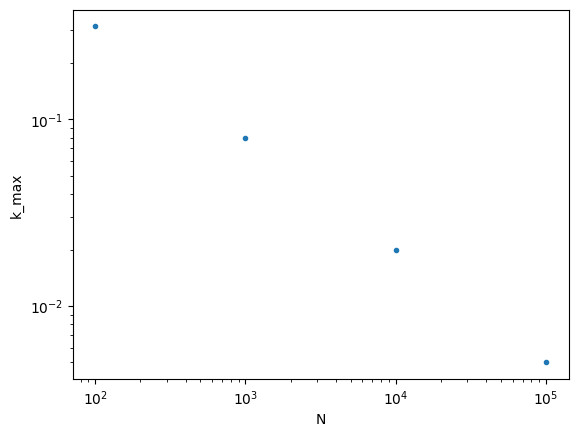

In [16]:
plt.figure(1) 

plt.xlabel('N') 
plt.xscale('log') 

plt.ylabel('k_max')
plt.yscale('log') 

plt.scatter(n_list, k_max_list, marker='.') 
plt.show()

In [17]:
def get_largest_subgraph(G):
    components = nx.connected_components(G)
    components = sorted(components, key=len, reverse=True)
    for c in components:
        G_sub = nx.subgraph(G, c)
        if nx.is_connected(G_sub) == True:
            return G_sub
    
#     Return a null graph as fallback/sanity
    return nx.Graph()

In [18]:
G_list = list(map(lambda n: sf_net(n, gamma=2.5, k_min=5), n_list))

G_comp_list = list(map(lambda g: get_largest_subgraph(g), G_list))

In [19]:
"""
We'll use this for calculating approx. avg shortest path for graphs with node more than 10^3
as the NX avg shortest path util uses O(N^3) Floyd-Warshall for all-pair shortest path
a graph of size 10^4 would take very long time to complete
"""
def get_large_graph_shortest_path(G):
    node_pairs = [np.random.choice(G, size=2, replace=False) for _ in range(100)]
    return np.mean(list(map(lambda n: nx.shortest_path_length(G, source=n[0], target=n[1]), node_pairs)))

In [20]:
def get_avg_shortest_path(G):
    node_no = G.number_of_nodes()
    if node_no > 10**3:
        return get_large_graph_shortest_path(G)
    return nx.average_shortest_path_length(G)

In [21]:
sp_list = list(map(lambda g: get_avg_shortest_path(g), G_comp_list))

print(sp_list)

[2.3773737373737376, 2.2594154154154156, 3.11, 3.25]


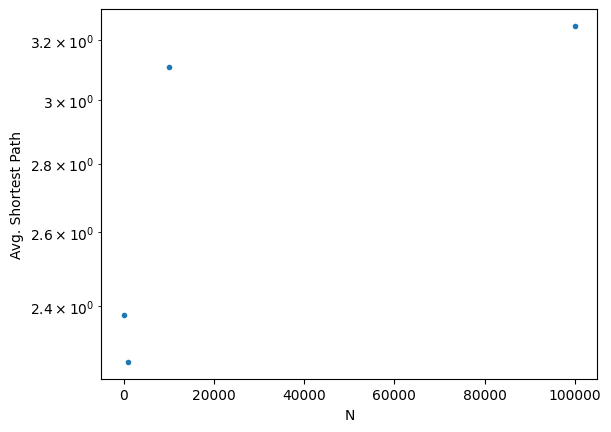

In [22]:
plt.figure(2)

plt.semilogy(n_list, sp_list, linestyle='None') 

plt.xlabel('N')
plt.ylabel('Avg. Shortest Path') 

plt.scatter(n_list, sp_list, marker='.')
    
plt.show()